### 머신 러닝 이론

### 코드 관련

#### 모델들의 파라미터들을 주의깊게 볼 필요가 있음.

#### train_test_split(X, y, test_size=?)
- test_size :
- - 데이터가 많음 (1000개 이상) -> 0.2 | 0.1
- - 데이터가 적음 (100개 이하) -> 0.2 | 정수로 직접 개수 지정
- - 학습 정확도보다 모델 검증이 더 중요할 때 -> 0.3 | 0.4

- train_size :
- - 훈련 데이터의 비율 또는 개수

- random_state :
- - 랜덤 시드 고정용 숫자 (예. 42, 2024, 123)

- stratify :
- - 분류 문제에서는 거의 필수
- - y의 클래스 비율을 유지하면서 나눔



#### `cross_validate` 함수란?

- `cross_validate`는 모델을 **교차 검증(K-Fold CV)** 방식으로 평가하고, **여러 성능 지표(metrics)**를 동시에 반환하는 함수입니다.

##### 주요 기능
- 여러 metric 동시에 평가 (`scoring=['accuracy', 'f1', ...]`)
- 학습 시간, 예측 시간까지 출력 (`fit_time`, `score_time`)
- `return_train_score=True` 옵션으로 훈련 점수도 제공

##### 사용 예시
```python
from sklearn.model_selection import cross_validate
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import load_iris

X, y = load_iris(return_X_y=True)
model = RandomForestClassifier()

results = cross_validate(model, X, y, cv=5, scoring=['accuracy', 'f1_macro'], return_train_score=True)
print(results)
```
##### 반환 형태
```
{
 'fit_time': [...],
 'score_time': [...],
 'test_accuracy': [...],
 'test_f1_macro': [...],
 'train_accuracy': [...],  # 옵션 사용 시
}
```

#### make_pipeline

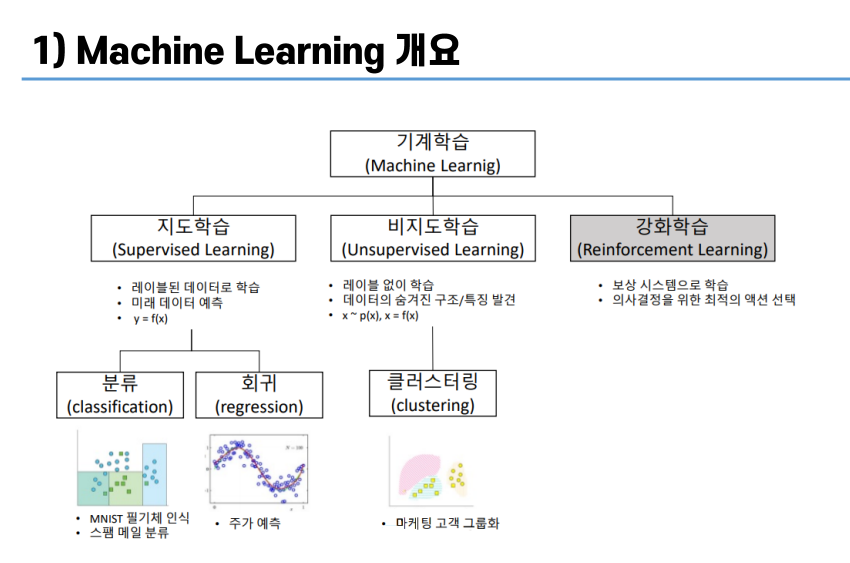

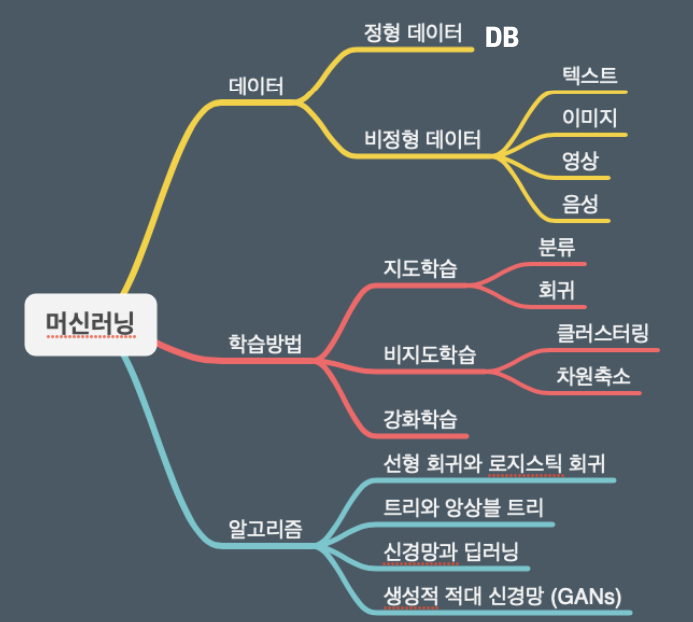

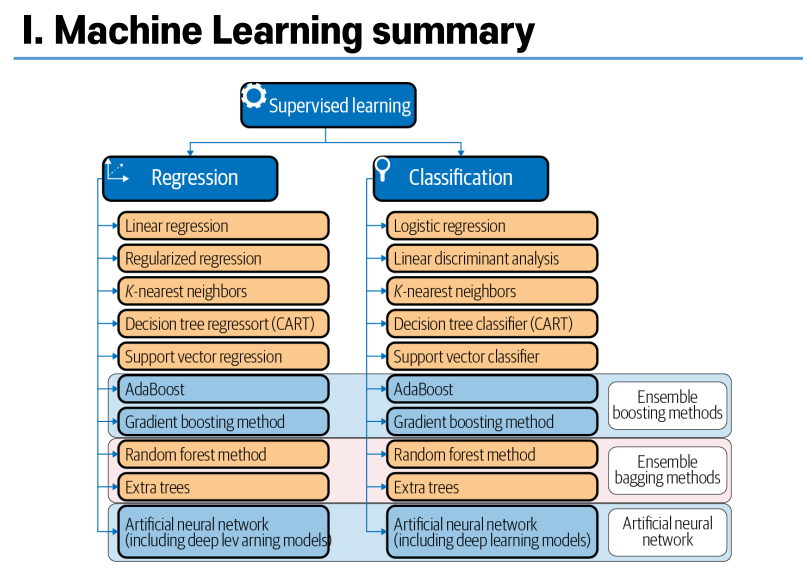


표준화 (Standardization)
- 표준화는 데이터의 값을 평균이 0, 표준편차가 1이 되도록 변환.
- 데이터가 정규분포에 가깝게 변환되며, **이상치의 영향을 상대적으로 덜 받는다.**

```python
scaler = StandardScaler()
standardized_data = scler.fit_transform(data)
print("표준화된 데이터 : ", standardized_data)
```

### SVM : support vector machine

#### 서포트 벡터 머신
- 지도 학습 알고리즘
- 분류(Classification)와 회귀(Regression) 문제를 해결
- 데이터 포인트들을 가장 잘 나누는 결정경계 또는 초평면(hyperplane)을 찾는 것이 목표
- 데이터가 선형적으로 분리되지 않는 경우(예: 데이터가 복잡하게 얽혀 있는 경우), 커널 트릭(kernel trick)을 사용해 문제 해결

##### 작동 원리
1. 데이터 표현 : SVM은 커널 트릭을 사용하여 입력 데이터를 고차원으로 변환하지 않고도 고차원 공간에서의 계산을 수행, 커널 함수로는 선형 커널, 다항식 커널, 가우시안 커널 등이 있음
2. 최적의 결정 경계 탐색 : 데이터를  가장 잘 분리하는 결정 경계를 찾음. 이 결정 경계는 클래스 간의 거리(마진)를 최대화하는 것을 목표로 한다.

- 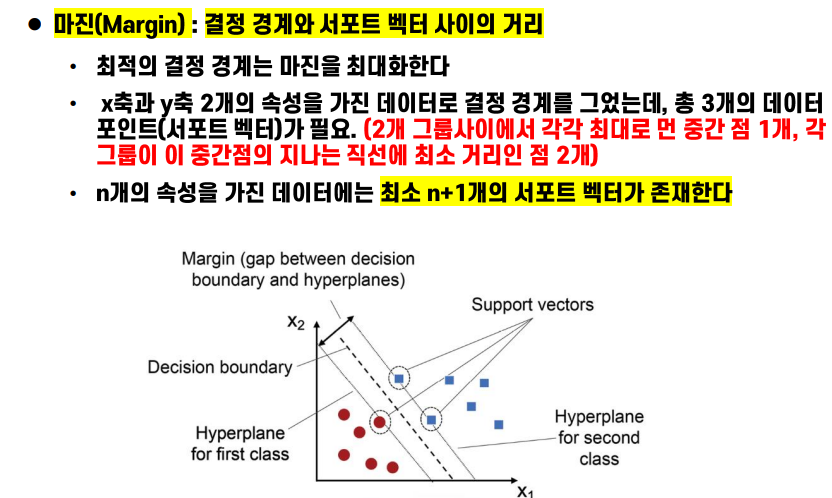

- 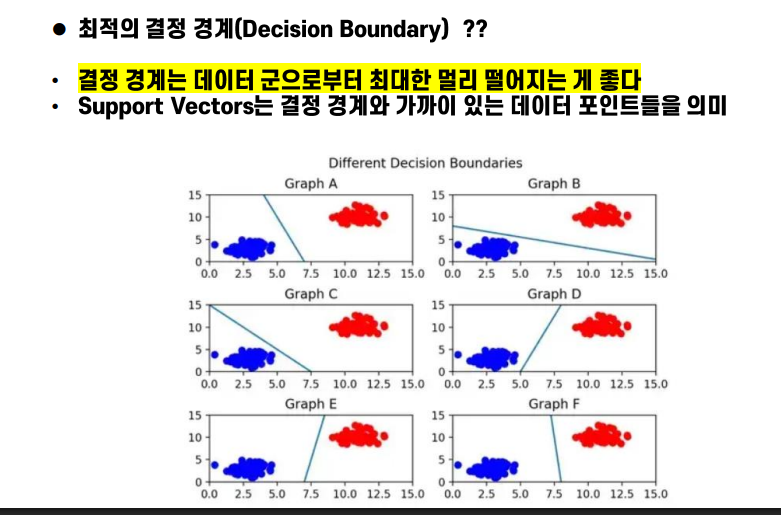

3. 서포트 벡터 : SVM은 결정 경계와 가장 가까운 서포트 벡터 결정. 이들 서포트 벡터들이 결정 경계의 형태와 위치를 결정하며, 학습된 SVM 모델은 이 서포트 벡터들에 의해 결정 경계를 특정짓게 된다.

- 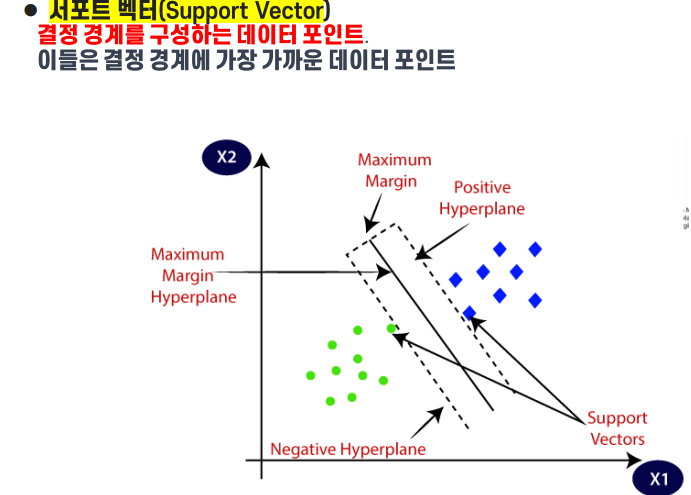


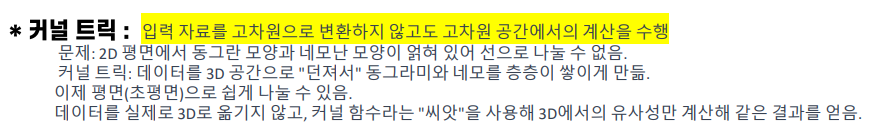

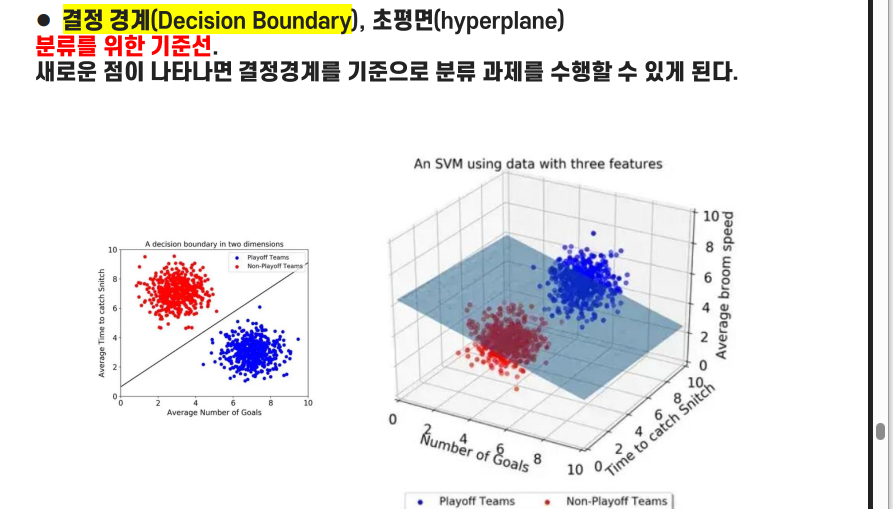

#### 커널 기법
##### 커널 함수 : 데이터를 고차원 공간으로 매핑하여 선형적으로 분리 가능한 문제로 변환

1. 선형 커널(Linear Kernel) : 원래 데이터 공간에서의 선형 결정 경계를 생성. 선형적으로 분리 가능한 문제에 적합.

2. 다항식 커널 (Polynomial Kernel) : 다항식 차수를 조정하여 다항식 결정 경계를 생성하여 비선형 문제에 대한 성능을 개선

3. 가우시안(RBF) 커널(Raidial Basis Function Kernel) : 정규 분포의 종 모양을 닮은 함수를 사용해, **가까운 데이터 포인트에는 높은 가중치를**, 먼 데이터 포인트에는 낮은 가중치를 주는 방식. 가우시안 커널은 비선형 문제에 매우 효과적이며, 가장 널리 사용되는 커널 중 하나

- 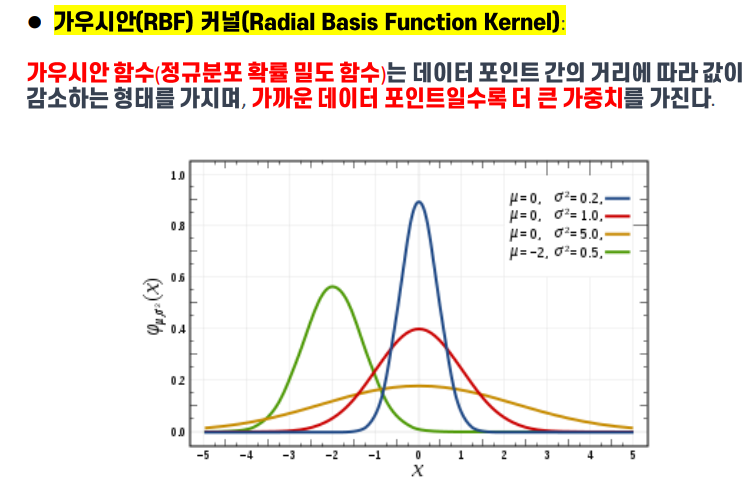

- 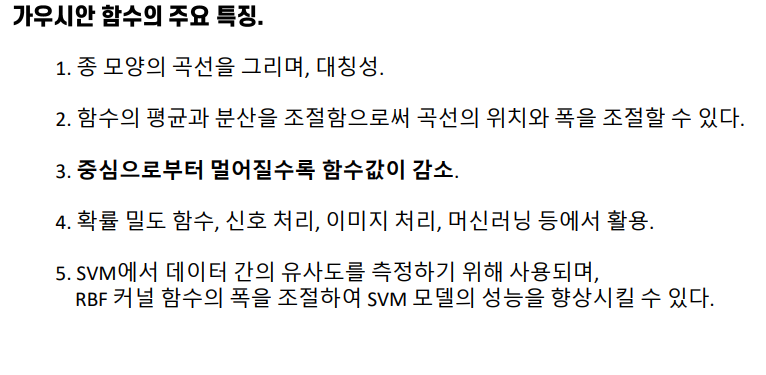

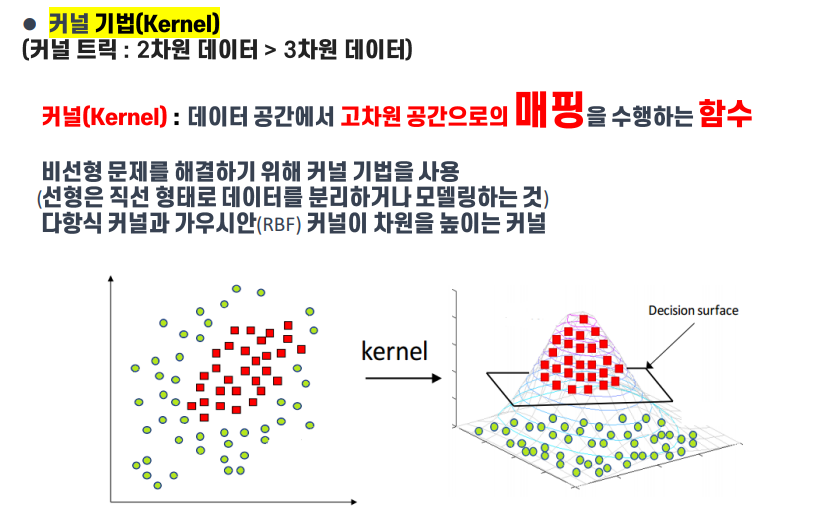

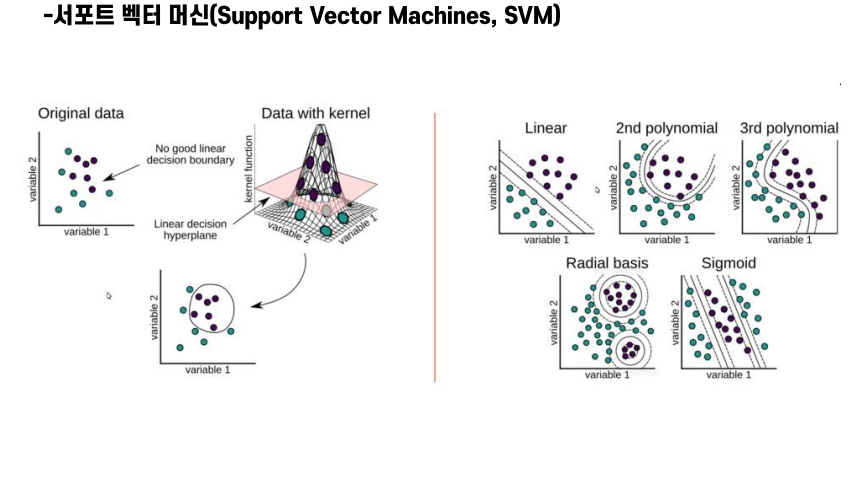

파라미터 "gamma" 값을 높이면 학습 데이터에 많이 의존해서 오버피팅을 초래
반대로 낮추면 언더피팅 초래 (커널 함수의 영향력을 조절하는 매개변수)

파마미터 "C"(Cost)
- 모델의 정규화 강도와 오분류에 대한 패널티를 조절하는 파라미터
- 작으면 오분류 허용, 크면 오분류에 대해 더 엄격한 제약
- 작으면 과정합에 강해짐, 크면 과적합에 약해짐


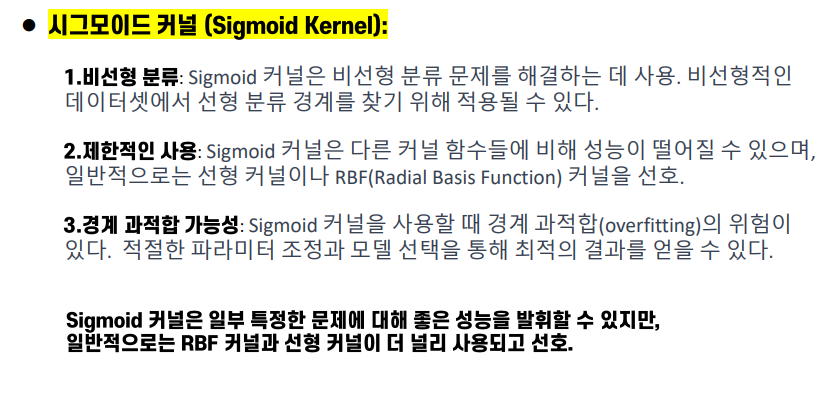


##### SVM 장점
1. 효과적인 분류 : 선형 및 비선형 문제 모두에 대해 효과적인 분류를 제공
2. 마진 최대화 : 결정 경계와 데이터 포인트 사이의 마진을 최대화하므로, 일반화 능력이 뛰어나고 과적합을 줄일 수 있다.
3. 커널 기법 : 커널 기법을 사용하여 비선형 문제를 해결할 수 있다. 데이터를 고차원 공간으로 매핑하여 선형적으로 분리 가능한 문제로 변환하는 것.
4. 이상치에 민감하지 않음 : SV에 의존하기 때문에 이상치에 영향을 덜 받는다.

##### SVM 단점
1. 계산 비용 : 대규모 데이터셋에서 계산 비용이 크며, 메모리 사용량이 많을 수 있음.
2. 파라미터 조정 : 커널 타입, 커널 파라미터, 규제 파라미터 등의 조정이 필요. 이를 최적화하기 위해 교차 검증과 같은 추가 작업이 필요할 수 있다.
3. 해석의 어려움 : 결정 경계가 고차원 공간에서 계산되는 경우 해석이 어려울 수 있다.

### 의사결정 나무 (Decision Trees)
데이터의 특징들을 기반으로 하나의 루트 노드에서 시작하여 분기하며, 각 분기마다 데이터를 가장 잘 분류할 수 있는 특징을 선택하여 트리를 구성.

각 노드는 특징(feature)/속성(attribute)을 나타내고, 가장 하위에 있는 노드는 결정 노드(decision node)/리프 노드(leaf node)라고 부르며, 분류 또는 예측 결과를 제공

정보획득량(Information Gain)은 의사결정 나무에서 각 특징을 선택할 때 사용되는 척도. 정보획득량은 불순도(impurity)를 기반으로 계산


#### 지니 불순도 (Gini Inpurity)
- 데이터의 불순도를 측정하는 지표로, 엔트로피(무질서한 정도)와 유사한 개념
- 의사결정나무는 지니 불순도를 최소화하는 방향으로 특징들을 선택하여 분기.
- 지니 불순도가 작을수록 분류가 잘 이루어진다고 판단

#### 엔트로피 (Entropy, 무질서)
- 정보 이론에서 나온 개념, 데이터 집합의 불순도를 측정하는 지표.
- 의사결정나무는 엔트로피를 최소화하는 방향으로 특징들을 선택하여 분기.
- 엔트로피 값이 낮을수록 분류가 잘 이루어진다고 판단.
- **leaf node로 갈수록 엔트로피(또는 지니 불순도)의 숫자가 대체로 낮아지거나 높아지는 경우 :** 데이터의 불확실성이 증가하고, 클래스 간의 경계가 모호해지는 현상. 이를 방지하기 위해 decision tree의 깊이를 제어하거나, 다른 알고리즘과 조합 등의 전략을 사용할 수 있다.

### 랜덤 포레스트 (random forest)
- 앙상블 학습 방법의 일종으로, 데이터학습 과정에서 구성한 다수의 결정 트리로부터 분류 또는 평균 예측치를 출력함으로써 동작.
- 일부 트리들이 오버피팅을 보일 수 있지만 다수의 트리 결과값을 기반으로 예측(voting)하기 때문에 좋은 결과값을 보임.

#### 배깅(Bagging : bootstrap + aggregating)
- 데이터세트에서 중복을 허용해서 샘플 자료를 뽑아(bootstrap)
- 여러 개의 의사결정트리를 구성하여 결과를 취합(aggregating)

#### Random selection of Features
- 전체 속성들 중 일부만 랜덤하게 고려하여 트리를 작성, 다수의 트리를 만들고 그 결과값이 나오면 voting/aggregating을 통해 최종 결과값을 결정

- - voting : 분류(Classification) -> 여러 모델이 투표하여 최종 클래스를 선택
- - - Hard Voting : 다수의 모델이 예측한 결과를 다수결로 결정하는 방식
- - - Soft Voting : 다수의 모델이 예측한 클래스 확률을 평균하여 에측


- - aggregating : 회귀(Regression), 일반 앙상블 -> 여러 모델의 출력값을 평균/결합하여 최종 예측 생성

#### 앙상블 기법의 부스팅(Boosting)
- 분류기의 과거 학습 결과를 토대로 학습결과가 좋지 않은 분류기의 **학습 데이터 샘플에 가중치를 부여하여** 좀 더 정확도 높은 모델을 만들어가는 기법
- 오류 최소화
- 성능 향상

- - AdaBoost(Adaptive Boosting) : 이전 학습기가 잘못 분류한 샘플들에 대해 집중하여 학습시켜 강한 학습기를 구성하는 앙상블 모델, 오차를 보완하도록 **샘플의 가중치**를 조정하며 학습을 진행.

- - Gradient Boosting : 이전 학습기 모델의 오차인 **잔차를 최소화** 하기위해 새로운 모델을 학습시키는 방식으로 오차를 보완하는 앙상블 모델

#### Extra Trees(Extreamely Randomized Trees)
- 결정 트리와 주요 차이점은 랜덤성의 정도
- 분할에 대한 특성의 무작위 선택을 강화하며, 이는 모델의 다양성을 증가시키고 과적합을 줄이는 효과.
1. 랜덤한 특성 선택 : 더 많은 무작위성
2. 랜덤한 임계값 선택 : 더 많은 다양성
3. 부트스트래핑 : 샘플링에서 무작위성을 추가로 도입하여 다양한 모델 생성
4. 예측 방법 : 평균 또는 다수결 방식으로 결합하여 최종 예측을 수행.


##### parameters

RandomForestClassifier :
- n_estimators : 앙상블에 사용할 의사 결정 트리의 개수지정. default = 100
- criterion : 분할 기준을 지정. "gini" | "entropy"를 선택. default = "gini"
- max_depth : 트리의 최대 깊이를 제한. 정수 | None. default = None
- min_samples_split : 분할을 위해 노드에 필요한 최소 샘플 수를 지정. 정수 | 실수(비율). default = 2
- min_samples_leaf : 리프 노드에 필요한 최소 샘플 수를 지정. default =1
- max_features : 각 트리에서 고려할 특성의 개수 또는 비율 지정. default ="auto" -> sqrt(n_features)를 의미
- random_state : 재현 가능한 결과를 얻기 위한 난수 시드를 지정.


RandomForestRegressor
- n_estimatores
- criterion
- max_depth
- min_samples_split
- min_samples_leaf
- max_features
- random_state

BaggingClassifier
- base_estimator : 기본 분류기 모델을 지정. 일반적으로 의사 결정. default = DT
- n_estimators : 분류기 개수. default = 10
- max_samples : 각 기본 분류기에 사용할 훈련 샘플 개수 또는 비율. default = 1.0(전체 샘플 사용)
- max_features : 각 기본 분류기에 사용할 특성의 개수 또는 비율. default = 1.0
- bootstrap : 재샘플링 시 중복 허용 여부(true -> 중복 허용). default = True
- bootstrap_features : 재심플링 시 특성도 중복 허용 여부. default = False
- random_state

BaggingRegressor
- base_estimator
- n_estimators
- max_samples
- max_features
- bootstrap
- random_state

ExtraTreesClassifier

ExtraTreesRegressor